In [1]:
import sys
sys.path.append( "/home/peer/PycharmProjects/neslearng")

In [2]:
import pandas
import hsa.ba.rewards as rewards
import itertools
from extern.fceux_learningenv.nes_python_interface.nes_python_interface import NESInterface
import hsa.machine_constants
from hsa.nes_python_input import py_to_nes_wrapper
from hsa.visualization.parse_fm2 import parse_fm2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
movie_paths = !ls ../../movies/*.*
movie_names = !ls ../../movies/

In [5]:
# just checking if the match up
list(zip(movie_names, movie_paths))

[('10_1-1_slow_with_powerup.fm2', '../../movies/10_1-1_slow_with_powerup.fm2'),
 ('11_1-1_small_walking.fm2', '../../movies/11_1-1_small_walking.fm2'),
 ('5_1-1_without-shortcut.fm2', '../../movies/5_1-1_without-shortcut.fm2'),
 ('6_1-1_with_shortcut.fm2', '../../movies/6_1-1_with_shortcut.fm2'),
 ('7_1-1_death_and_checkpoint_no_shortcut.fm2',
  '../../movies/7_1-1_death_and_checkpoint_no_shortcut.fm2'),
 ('8_1-1_death_and_shortcut.fm2', '../../movies/8_1-1_death_and_shortcut.fm2'),
 ('9_1-1_death_in_shortcut.fm2', '../../movies/9_1-1_death_in_shortcut.fm2')]

In [5]:
reward_functions = {
    "scaled_for_time_left":lambda:rewards.scaled_for_time_left,
    "delta_potential":rewards.make_delta_potential,
    "main_reward":rewards.make_main_reward,
    "mario_x_speed":lambda:rewards.mario_x_speed,
    "delta_points":rewards.make_delta_points
}

In [6]:
def reward_from_movie(movie_path):
    reward_func_instances = {name: factory() for name, factory in reward_functions.items()}
    nes = NESInterface(hsa.machine_constants.mario_rom_location, eb_compatible=False, auto_render_period=3, reward_function="ehrenbrav")
    with open(movie_path) as movie_file:
        inputs_from_movie = list(parse_fm2(movie_file))
    movie_length = len(inputs_from_movie)
    
    df = pandas.DataFrame(index=range(movie_length),
                          columns=(list(reward_functions.keys())+["ehrenbrav"]),
                          dtype = np.float)
    
    for i, combi in enumerate(inputs_from_movie):
        reward = nes.act(py_to_nes_wrapper(combi))
        if i < 6:
            continue # ignore the first few frames on the start menu, because the rewards are not valid there
        df.at[i,"ehrenbrav"] = reward
        ram = nes.getRAM()
        for name, func in reward_func_instances.items():
            df.at[i,name] = func(ram)        
    del nes
    return df


In [7]:
example_reward_results = reward_from_movie(movie_paths[1])

In [45]:
example_reward_results

,mario_x_speed,delta_points,main_reward,delta_potential,scaled_for_time_left,ehrenbrav
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b68c97d68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f0b68b6aa20>], dtype=object)

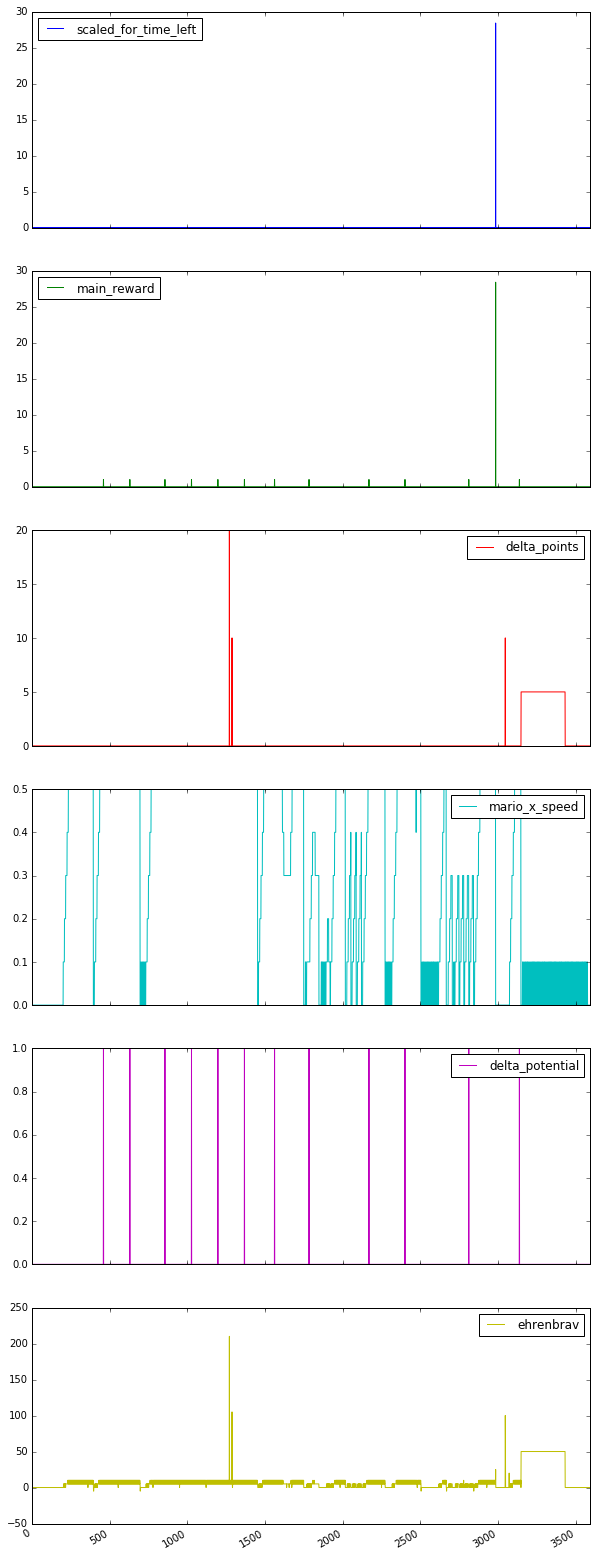

In [10]:
example_reward_results.plot(subplots=True,figsize=(10,30))
#  ,figsize=(300, 900)

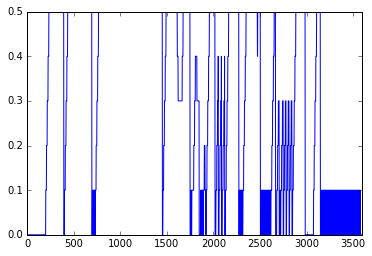

In [18]:
example_reward_results["mario_x_speed"].plot()
# plt.scatter(y=example_reward_results["mario_x_speed"],x=range(len(example_reward_results["mario_x_speed"])))

In [27]:
list(reward_functions.keys())+["ehrenbrav"]

['main_reward',
 'mario_x_speed',
 'delta_potential',
 'scaled_for_time_left',
 'delta_points',
 'ehrenbrav']

In [11]:
reward_frames = {}
for movie_name, movie_path in zip(movie_names,movie_paths):
    reward_frames[movie_name] = reward_from_movie(movie_path)

In [ ]:
!mkdir reward_result_files

In [12]:
%cd reward_result_files

/home/peer/PycharmProjects/neslearng/hsa/ba/reward_result_files


In [ ]:
for movie_name, frame in reward_frames.items():
    movie_name_no_ending = movie_name[:-4]
    frame.to_csv(movie_name_no_ending + ".csv")
    for reward_name in frame.columns:
        frame[reward_name].plot()
        plt.savefig("{}--{}.png".format(movie_name_no_ending,reward_name),format="png")
        plt.clf()

In [13]:
for movie_name, frame in reward_frames.items():
    movie_name_no_ending = movie_name[:-4]
    frame.plot(subplots=True,figsize=(10, 40))
    plt.savefig("{}-all.png".format(movie_name_no_ending),format="png")
    plt.clf()

In [19]:
%cd ..

/home/peer/PycharmProjects/neslearng/ba_results
